# Python Hands-On Project

## Project Description

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

You have received three CSV files. After loading the data into Python, answer the following questions:
1. Load the three CSV files (airlines.csv, airports.csv, and flights.csv). Display the shape and column names for each file.
2. Remove all cancelled and diverted flights (5 points).
3. Replace missing values in all delay reason columns ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY') with 0. Show the number of missing values for each of the columns before replacement, and confirm that missing values have been replaced (5 points).
4. Drop rows with missing values in 'ARRIVAL_TIME', 'DEPARTURE_TIME', or 'AIR_TIME'. Show the number of flights before and after dropping the missing values (5 points).
5. Create a column 'TOTAL_DELAY' by summing all five delay reason columns for each flight (5 points).
6. Create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE' (e.g., 1330 → 13) (5 points).
7. In the flights dataset, how many unique airlines are there? List their airline code and airline names (7.5 points).
8. What are the top 5 most common destination airports by number of flights? List the IATA_CODE, Airport Name, and flight count (7.5 points).
9. Which destination city has the highest average total delay? (7.5 points).
10. What is the average arrival delay for each airline? (7.5 points).
11. How many flights were cancelled per airline? (7.5 points).
12. Which hour of the day had the most scheduled departures? (7.5 points).
13. Which city had the most flights arriving overall? (5 points).
14. What percentage of flights were delayed ('ARRIVAL_DELAY' > 15)? (5 points).
15. Create a histogram of flight distances (10 points).
16. Create a bar chart showing the top 5 airlines with the highest average arrival delay (10 points).

In [62]:
import pandas as pd
import numpy as np
import plotnine as p9
import copy

# 1. Load & Diplay Files
Load the three CSV files (airlines.csv, airports.csv, and flights.csv). Display the shape and column names for each file.

In [63]:
airlines = pd.read_csv("airlines.csv")
print(f"The columns of the airlines.csv file is {airlines.columns.tolist()}")
print(f"The shape of the airlines.csv file is {airlines.shape}")

The columns of the airlines.csv file is ['IATA_CODE', 'AIRLINE']
The shape of the airlines.csv file is (14, 2)


In [64]:
airports = pd.read_csv("airports.csv")
print(f"The columns of the airports.csv file is {airports.columns.tolist()}")
print(f"The shape of the airports.csv file is {airports.shape}")

The columns of the airports.csv file is ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']
The shape of the airports.csv file is (322, 7)


In [65]:
flights = pd.read_csv("flights.csv", low_memory = False)
print(f"The columns of the flights.csv file is {flights.columns}")
print(f"The shape of the flights.csv file is {flights.shape}")

The columns of the flights.csv file is Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
The shape of the flights.csv file is (5819079, 31)


# 2. Remove Cancelled + Diverted Flights
Remove all cancelled and diverted flights (5 points).

In [66]:
successful_flights = flights[(flights['DIVERTED'] == 0) & (flights['CANCELLED'] == 0)]
print(f"The shape of the successful_flights.csv data frame is {successful_flights.shape}")

The shape of the successful_flights.csv data frame is (5714008, 31)


# 3. Replace Missing Delay Values
Replace missing values in all delay reason columns ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY') with 0. Show the number of missing values for each of the columns before replacement, and confirm that missing values have been replaced (5 points).

In [67]:
print(f"""Missing value count for delay reason:
    AIR_SYSTEM_DELAY: {flights['AIR_SYSTEM_DELAY'].isnull().sum()}
    SECURITY_DELAY: {flights['SECURITY_DELAY'].isnull().sum()}
    AIRLINE_DELAY: {flights['AIRLINE_DELAY'].isnull().sum()}
    LATE_AIRCRAFT_DELAY: {flights['LATE_AIRCRAFT_DELAY'].isnull().sum()}
    WEATHER_DELAY: {flights['WEATHER_DELAY'].isnull().sum()}""")

Missing value count for delay reason:
    AIR_SYSTEM_DELAY: 4755640
    SECURITY_DELAY: 4755640
    AIRLINE_DELAY: 4755640
    LATE_AIRCRAFT_DELAY: 4755640
    WEATHER_DELAY: 4755640


In [68]:
cleaned_delays_flights = copy.deepcopy(flights)
cleaned_delays_flights['AIR_SYSTEM_DELAY'] = cleaned_delays_flights['AIR_SYSTEM_DELAY'].fillna(0)
cleaned_delays_flights['SECURITY_DELAY'] = cleaned_delays_flights['SECURITY_DELAY'].fillna(0)
cleaned_delays_flights['AIRLINE_DELAY'] = cleaned_delays_flights['AIRLINE_DELAY'].fillna(0)
cleaned_delays_flights['LATE_AIRCRAFT_DELAY'] = cleaned_delays_flights['LATE_AIRCRAFT_DELAY'].fillna(0)
cleaned_delays_flights['WEATHER_DELAY'] = cleaned_delays_flights['WEATHER_DELAY'].fillna(0)

In [69]:
print(f"""Missing value count for delay reason:
    AIR_SYSTEM_DELAY: {cleaned_delays_flights['AIR_SYSTEM_DELAY'].isnull().sum()}
    SECURITY_DELAY: {cleaned_delays_flights['SECURITY_DELAY'].isnull().sum()}
    AIRLINE_DELAY: {cleaned_delays_flights['AIRLINE_DELAY'].isnull().sum()}
    LATE_AIRCRAFT_DELAY: {cleaned_delays_flights['LATE_AIRCRAFT_DELAY'].isnull().sum()}
    WEATHER_DELAY: {cleaned_delays_flights['WEATHER_DELAY'].isnull().sum()}""")

Missing value count for delay reason:
    AIR_SYSTEM_DELAY: 0
    SECURITY_DELAY: 0
    AIRLINE_DELAY: 0
    LATE_AIRCRAFT_DELAY: 0
    WEATHER_DELAY: 0


# 4. Drop Rows With Missing Values
Drop rows with missing values in 'ARRIVAL_TIME', 'DEPARTURE_TIME', or 'AIR_TIME'. Show the number of flights before and after dropping the missing values (5 points).

In [70]:
print(f"The number of flights in the flights dataframe is {len(flights):,}")

flights_clean = flights.dropna(subset=['ARRIVAL_TIME', 'DEPARTURE_TIME', 'AIR_TIME']).copy()

print(f"The number of flights in the flights dataframe after dropping missing values in arrival time, departure time, and air time is {len(flights_clean):,}")

The number of flights in the flights dataframe is 5,819,079
The number of flights in the flights dataframe after dropping missing values in arrival time, departure time, and air time is 5,714,008


# 5. Create a Summation Column
Create a column 'TOTAL_DELAY' by summing all five delay reason columns for each flight (5 points).

In [71]:
flights_clean['TOTAL_DELAY'] = flights_clean[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)

# 6. Create String Slice Column
Create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE' (e.g., 1330 → 13) (5 points).

In [72]:
flights['SCHEDULED_HOUR'] = flights['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str.slice(0,2)
        
#pd.set_option('display.max_columns', None)

flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_HOUR
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,00
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,00
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,00
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,00
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,00


# 7. Unique Airlines
In the flights dataset, how many unique airlines are there? List their airline code and airline names (7.5 points).

In [73]:
print(flights['AIRLINE'].nunique())

14


In [74]:
airlines.value_counts()

IATA_CODE  AIRLINE                     
AA         American Airlines Inc.          1
AS         Alaska Airlines Inc.            1
B6         JetBlue Airways                 1
DL         Delta Air Lines Inc.            1
EV         Atlantic Southeast Airlines     1
F9         Frontier Airlines Inc.          1
HA         Hawaiian Airlines Inc.          1
MQ         American Eagle Airlines Inc.    1
NK         Spirit Air Lines                1
OO         Skywest Airlines Inc.           1
UA         United Air Lines Inc.           1
US         US Airways Inc.                 1
VX         Virgin America                  1
WN         Southwest Airlines Co.          1
Name: count, dtype: int64

# 8. Top Destinations
What are the top 5 most common destination airports by number of flights? List the IATA_CODE, Airport Name, and flight count (7.5 points).

In [75]:
flight_counts_s = flights_clean['DESTINATION_AIRPORT'].value_counts()
flight_counts = flight_counts_s.reset_index().head(5)

airport_merge = airports[['IATA_CODE', 'AIRPORT']]

flight_counts_full = flight_counts.merge(airport_merge, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
top_destinations = flight_counts_full[['AIRPORT', 'IATA_CODE', 'count']]
top_destinations


,AIRPORT,IATA_CODE,count
0,Hartsfield-Jackson Atlanta International Airport,ATL,343076
1,Chicago O'Hare International Airport,ORD,275864
2,Dallas/Fort Worth International Airport,DFW,231764
3,Denver International Airport,DEN,193033
4,Los Angeles International Airport,LAX,192136


# 9. Highest Average Delay
Which destination city has the highest average total delay? (7.5 points).

In [76]:
avg_delay_by_city = flights_clean.groupby('DESTINATION_AIRPORT')['TOTAL_DELAY'].mean().sort_values(ascending=False)
avg_delay_by_city


DESTINATION_AIRPORT
13964    29.500000
ILG      24.663158
STC      24.337662
MQT      22.081081
TTN      21.832307
           ...    
13127     0.283019
10666     0.000000
12016     0.000000
11503     0.000000
13541     0.000000
Name: TOTAL_DELAY, Length: 629, dtype: float64

# 10. Average Arrival Delay
What is the average arrival delay for each airline? (7.5 points).

In [77]:
avg_arr_delay_by_airline = flights_clean.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)
avg_arr_delay_by_airline

AIRLINE
NK    14.471800
F9    12.504706
B6     6.677861
EV     6.585379
MQ     6.457873
OO     5.845652
UA     5.431594
VX     4.737706
WN     4.374964
US     3.706209
AA     3.451372
HA     2.023093
DL     0.186754
AS    -0.976563
Name: ARRIVAL_DELAY, dtype: float64

# 11. Cancellations Per Airline
How many flights were cancelled per airline? (7.5 points).

In [78]:
cancellations_by_airline = flights.groupby('AIRLINE')['CANCELLED'].sum().sort_values(ascending=False)
cancellations_by_airline

AIRLINE
WN    16043
EV    15231
MQ    15025
AA    10919
OO     9960
UA     6573
B6     4276
US     4067
DL     3824
NK     2004
AS      669
F9      588
VX      534
HA      171
Name: CANCELLED, dtype: int64

# 12 Departures by Hour
Which hour of the day had the most scheduled departures? (7.5 points).

In [79]:
departures_by_hour = flights['SCHEDULED_HOUR'].value_counts()
departures_by_hour

SCHEDULED_HOUR
06    406940
07    393947
17    390362
08    381014
10    371644
15    367760
13    363509
11    358084
12    355611
09    351403
18    334380
16    334153
19    331338
14    329715
20    259432
21    187467
05    118051
22    117551
23     44172
00     14664
01      5159
02      1414
03       778
04       531
Name: count, dtype: int64

# 13 Arrivals By City
Which city had the most flights arriving overall? (5 points).

In [80]:
flights_clean_with_dest_city = pd.merge(flights_clean, airports, left_on = 'DESTINATION_AIRPORT', right_on = 'IATA_CODE')

arrivals_by_city = flights_clean_with_dest_city['CITY'].value_counts()
arrivals_by_city

CITY
Chicago              354342
Atlanta              343076
Dallas-Fort Worth    231764
Houston              194601
Denver               193033
                      ...  
St Cloud                 77
Dillingham               77
Gustavus                 74
King Salmon              63
Ithaca                   31
Name: count, Length: 308, dtype: int64

# 14 Percent Arrivals Delayed
What percentage of flights were delayed ('ARRIVAL_DELAY' > 15)? (5 points)

In [81]:
pct_delayed = len(flights_clean[flights_clean['ARRIVAL_DELAY']>15])/len(flights_clean)
pct_delayed

0.1791208552735663

# 15 Histogram of Flight Distance
Create a histogram of flight distances (10 points).

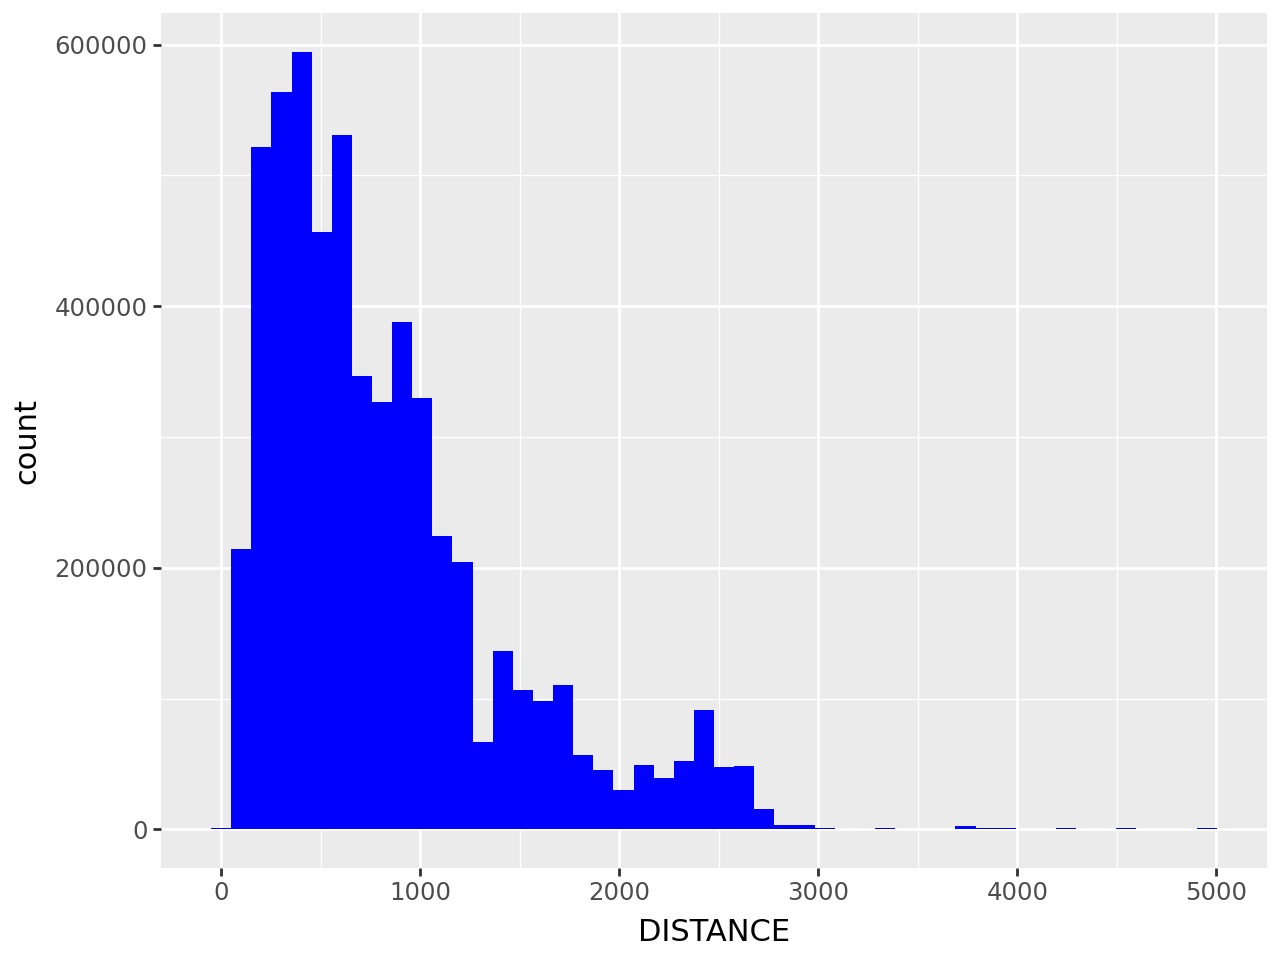

In [82]:
plot = (
    p9.ggplot(flights_clean, p9.aes(x = 'DISTANCE')) +
    p9.geom_histogram(fill='blue', bins = 50)
)
plot.show()

# 16 Bar Chart
Create a bar chart showing the top 5 airlines with the highest average arrival delay (10 points)

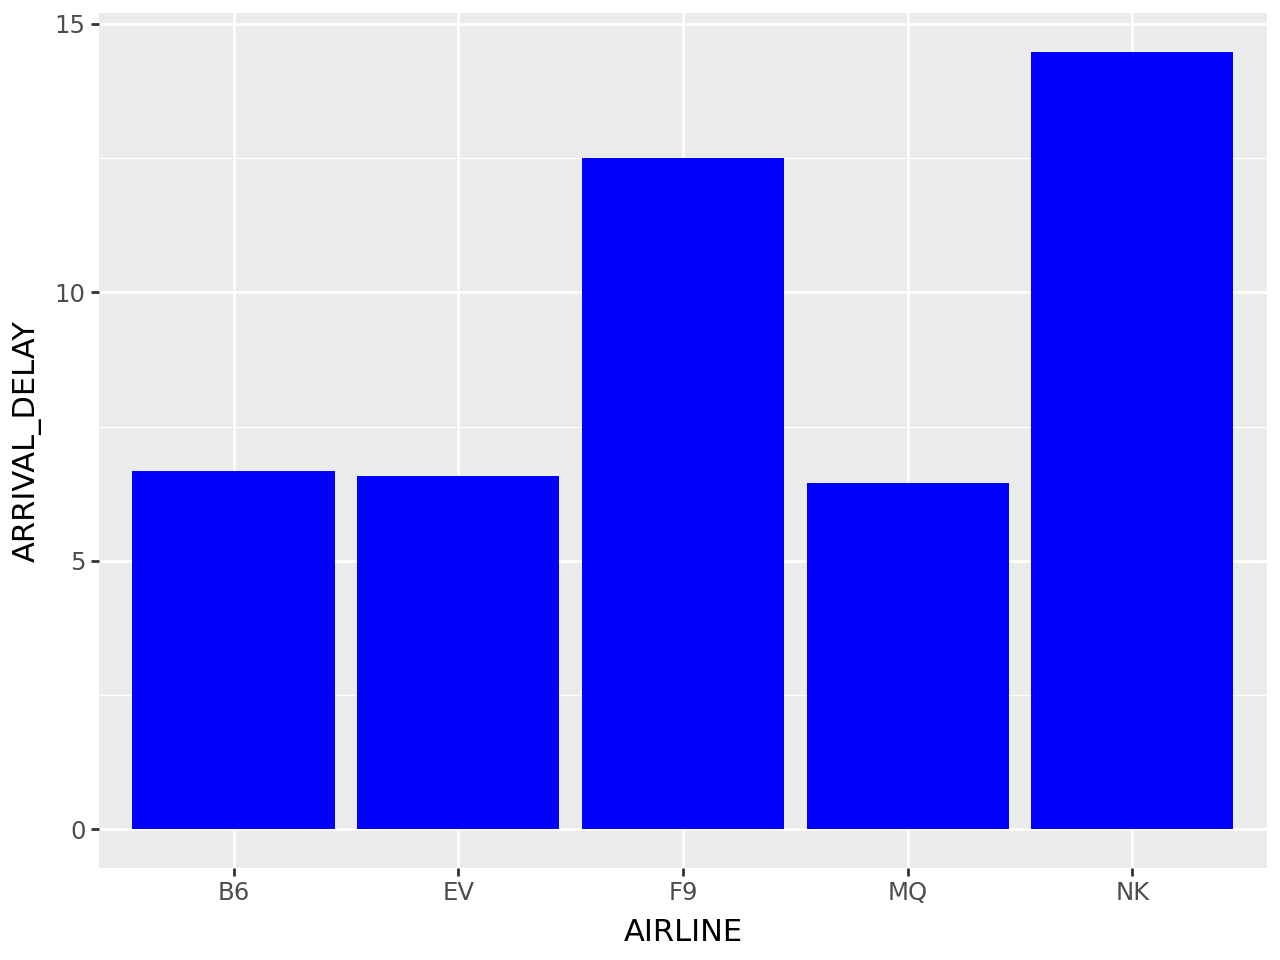

In [84]:
delayed_airlines = avg_arr_delay_by_airline.reset_index()[0:5]

bar_chart = (
    p9.ggplot(delayed_airlines, p9.aes(x = 'AIRLINE', y = 'ARRIVAL_DELAY')) +
    p9.geom_bar(stat='identity', fill = 'blue')
)
bar_chart.show()